In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("/home/darnesh/projects/Customer_churn_prediction/notebook/data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [6]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df = df[df['TotalCharges']!=' ']

In [8]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'])

In [9]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6427,Male,0,No,No,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,802.35,No
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No
6781,Male,0,No,Yes,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.65,220.10,Yes
1045,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.30,4209.95,No
3894,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No


In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### No missing values

In [11]:
df.select_dtypes(include=object).apply(lambda x: x.unique(), axis=0)

gender                                                 [Female, Male]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract                         [Month-to-month, One year, Two year]
PaperlessBilling                                            [Yes, No]
PaymentMethod       

In [12]:
df.replace(['No phone service','No internet service'],'No',inplace=True)

#### Univariate analysis

(0.0, 1.0, 0.0, 1.0)

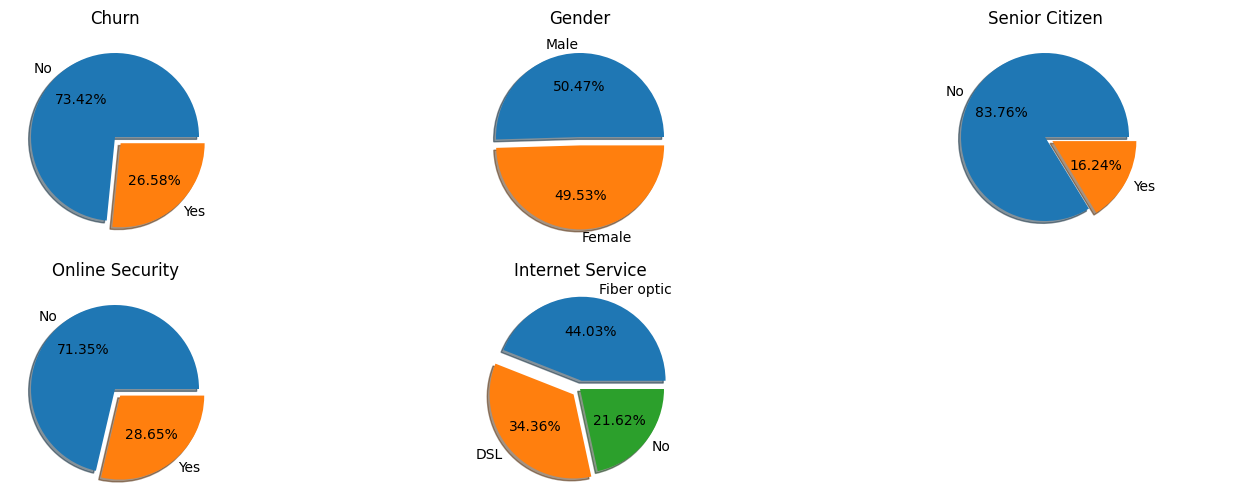

In [13]:
fig,ax = plt.subplots(2,3,figsize=(17,6))
ax[0,0].pie(x=df['Churn'].value_counts(),labels=['No','Yes'],autopct='%.2f%%',explode=[0,0.1],shadow=True) ; ax[0,0].set_title('Churn')
ax[0,1].pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%.2f%%',explode=[0,0.1],shadow=True); ax[0,1].set_title('Gender')
ax[0,2].pie(x=df['SeniorCitizen'].value_counts(),labels=['No','Yes'],autopct='%.2f%%',explode=[0,0.1],shadow=True); ax[0,2].set_title('Senior Citizen')
ax[1,0].pie(x=df['OnlineSecurity'].value_counts(),labels=['No','Yes'],autopct='%.2f%%',explode=[0,0.1],shadow=True); ax[1,0].set_title('Online Security')
ax[1,1].pie(x=df['InternetService'].value_counts(),labels=['Fiber optic','DSL','No'],autopct='%.2f%%',explode=[0.1,0.1,0],shadow=True); ax[1,1].set_title('Internet Service')
ax[1,2].axis('off')


#### Bivariate Analysis

Error in callback <function _draw_all_if_interactive at 0x7f509520d5a0> (for post_execute):


KeyboardInterrupt: 

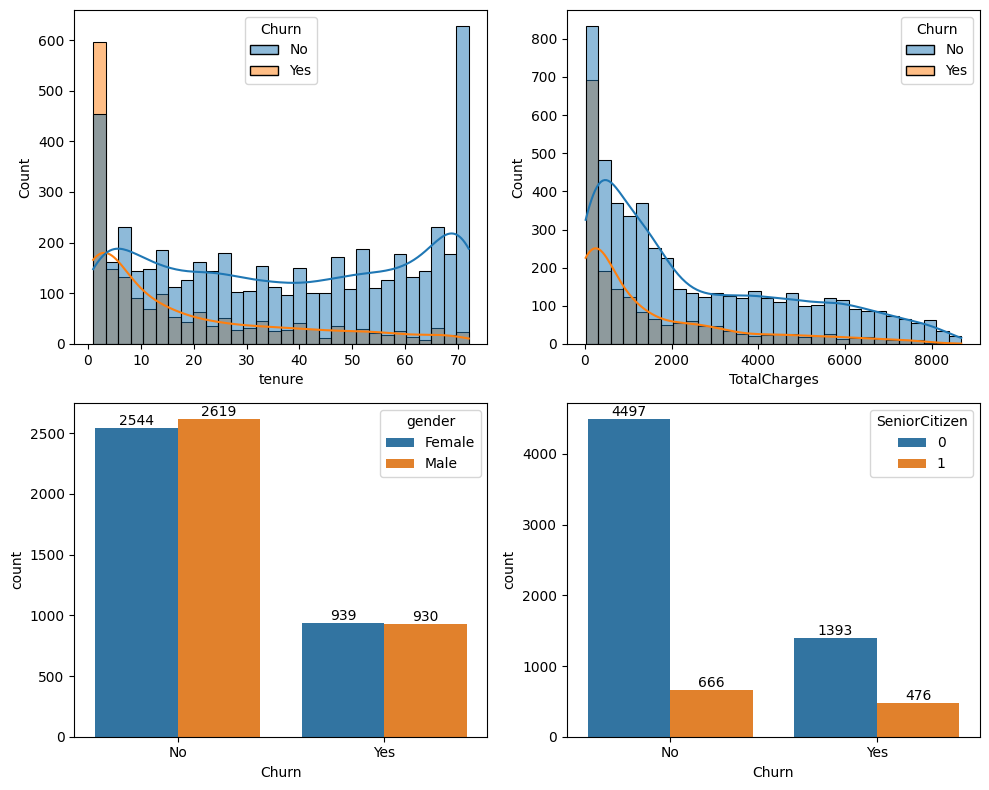

In [14]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
sns.histplot(x=df['tenure'],hue=df['Churn'],bins=30,kde=True,ax=ax[0,0])
sns.histplot(x=df['TotalCharges'],hue=df['Churn'],bins=30,kde=True,ax=ax[0,1])
gender = sns.countplot(x=df['Churn'],hue=df['gender'],ax=ax[1,0])
for container in gender.containers:
    gender.bar_label(container)
seniority = sns.countplot(x=df['Churn'],hue=df['SeniorCitizen'],ax=ax[1,1])
for container in seniority.containers:
    seniority.bar_label(container)
plt.tight_layout()

#### Multivariate Analysis

In [ ]:
sns.pairplot(data=df,hue='Churn')

#### Outliers

In [ ]:
df.select_dtypes(exclude=object).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

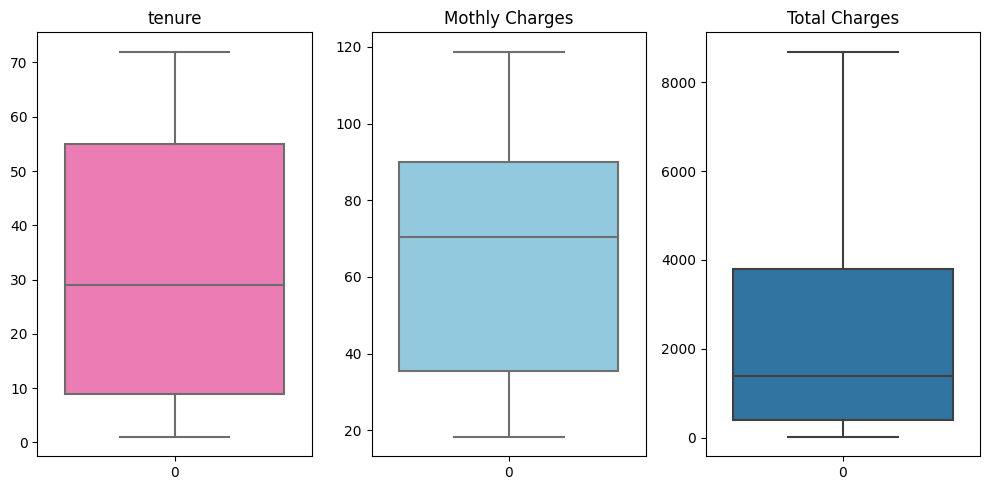

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10,5))
sns.boxplot(df['tenure'],ax=ax[0], color='hotpink') ; ax[0].set_title('tenure')
sns.boxplot(df['MonthlyCharges'],ax=ax[1],color = 'skyblue') ; ax[1].set_title('Mothly Charges')
sns.boxplot(df['TotalCharges'],ax=ax[2]) ; ax[2].set_title('Total Charges')
plt.tight_layout()